# Capstone Project: Breast Cancer machine learning based app

# Data preparation and import libraries/dependencies

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [330]:
data = pd.read_csv('data.csv')

# Data Exploration and Data Analysis

In [334]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [320]:
data.shape

(569, 33)

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [57]:
# Check Duplication
data.duplicated().sum()

0

- There aren't duplicate values

In [336]:
# check Missing value
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- No Missing Value is found

In [338]:
# Check the number of unique values of each column
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

- Dropping the id and Unnamed: 32 columns which will not provide any information for our model

In [305]:
data = data.drop(['id','Unnamed: 32'], axis= 1)

- Changed the name of the diagnostic column to target!

In [350]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [352]:
data = data.rename(columns={'diagnosis' : 'target'})

- changed taget data in the dataset. I changed malignant to 1 and benign to 0.

In [354]:
data.target.replace({'M' : '1','B': '0'},inplace=True)

In [356]:
# Converting target type to int64
data.target = data.target.astype('float64')

### Data processing result

In [358]:
data.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [340]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   target                   569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [344]:
# Check statistic of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# Data Verification/Validation

In [68]:
# I looked at how many benign and malignant yields there are.
data.target.value_counts()

target
B    357
M    212
Name: count, dtype: int64

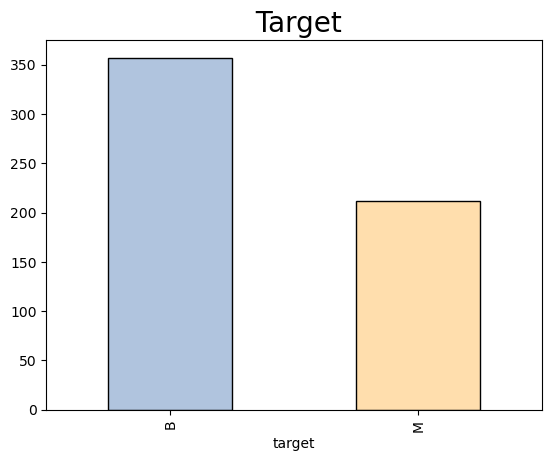

In [70]:
# visualized target data in the dataset.
data['target'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title(" Target",fontsize=20)
plt.show()

- 1-->Malignant
- 0-->Benign

In [360]:
# Correlation validation
cor = data.corr()
cor

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
target,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


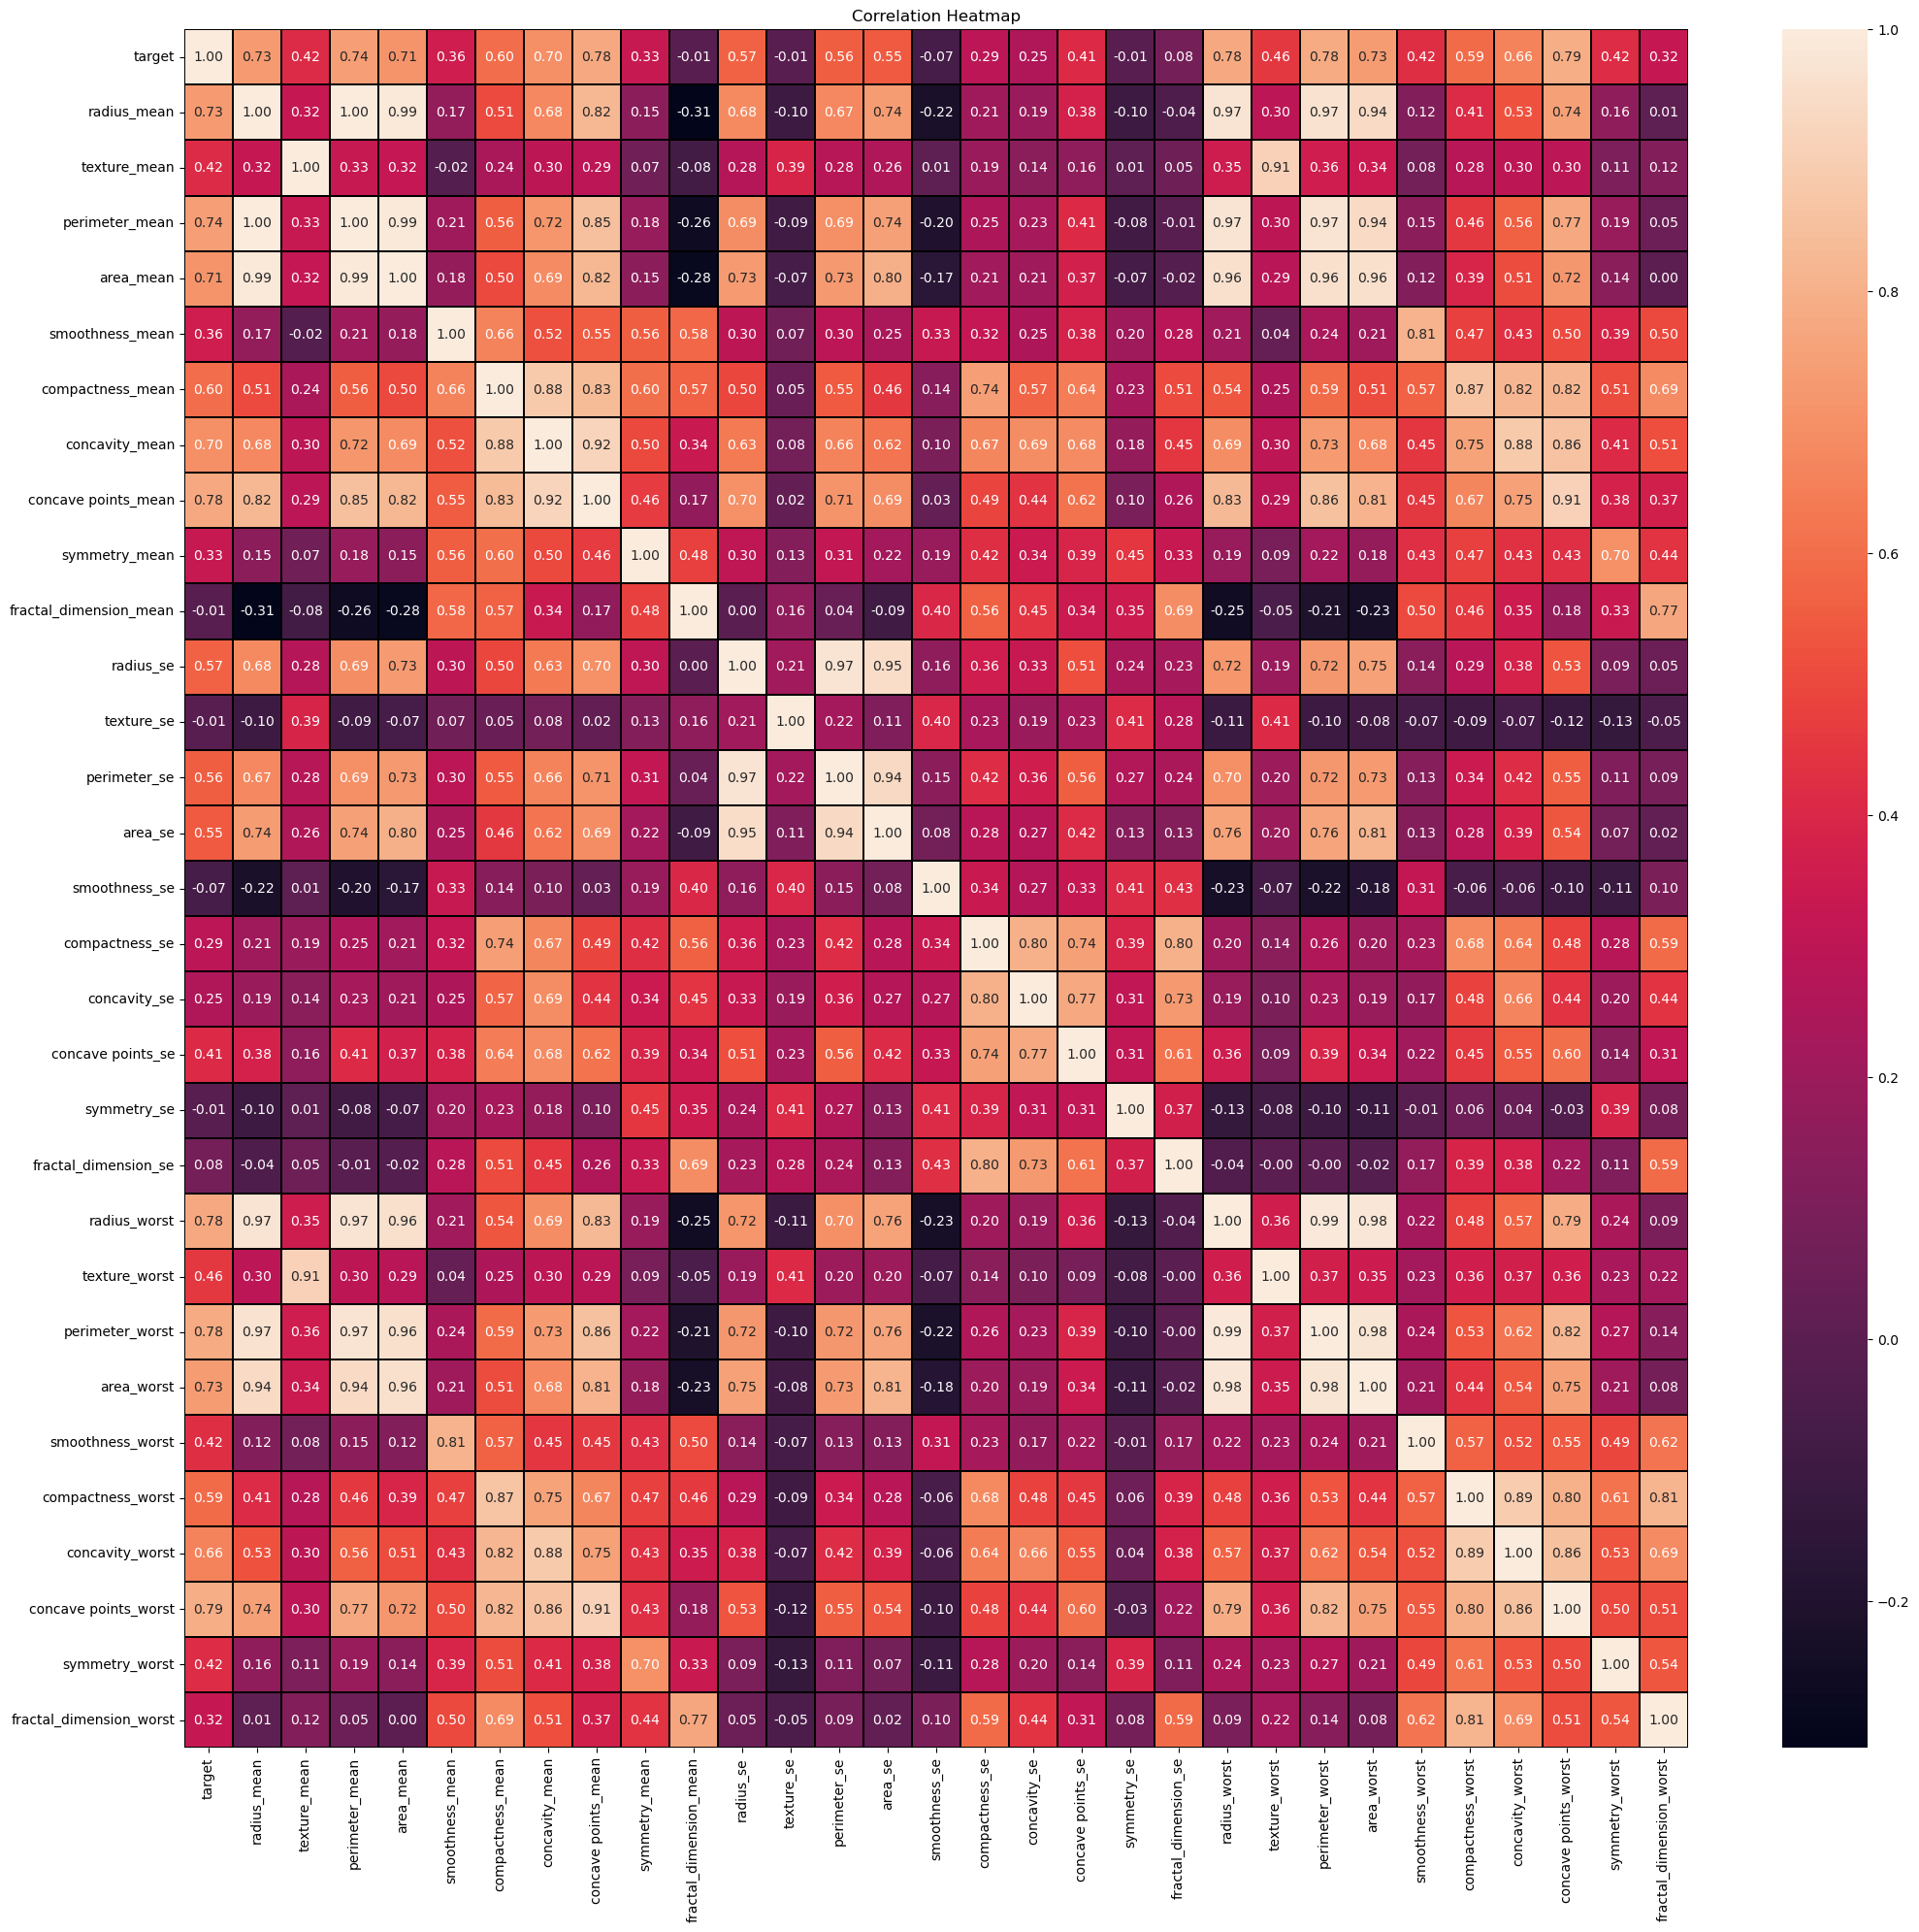

In [241]:
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

- Data with a correlation greater than 0.75.

<Figure size 1000x800 with 0 Axes>

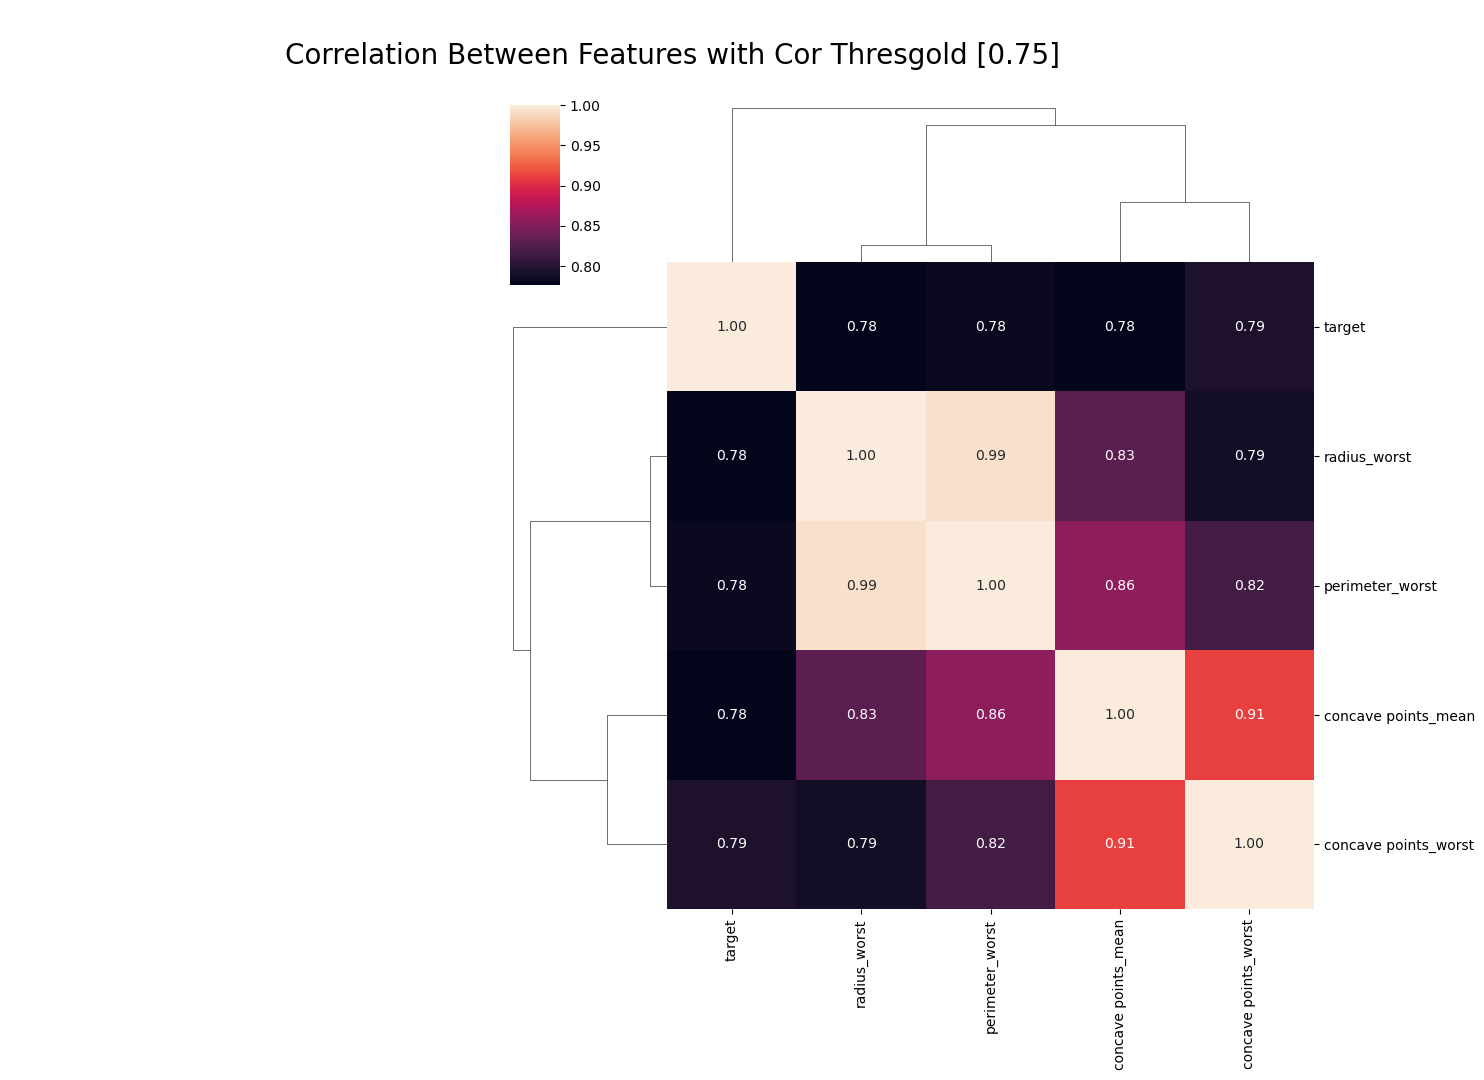

In [362]:
threshold = 0.75
filtre = np.abs(cor["target"] > threshold)
corr_features = cor.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("\n                               Correlation Between Features with Cor Thresgold [0.75]\n",fontsize=20)
plt.show()

###  Visualization the data with a correlation greater than 0.75

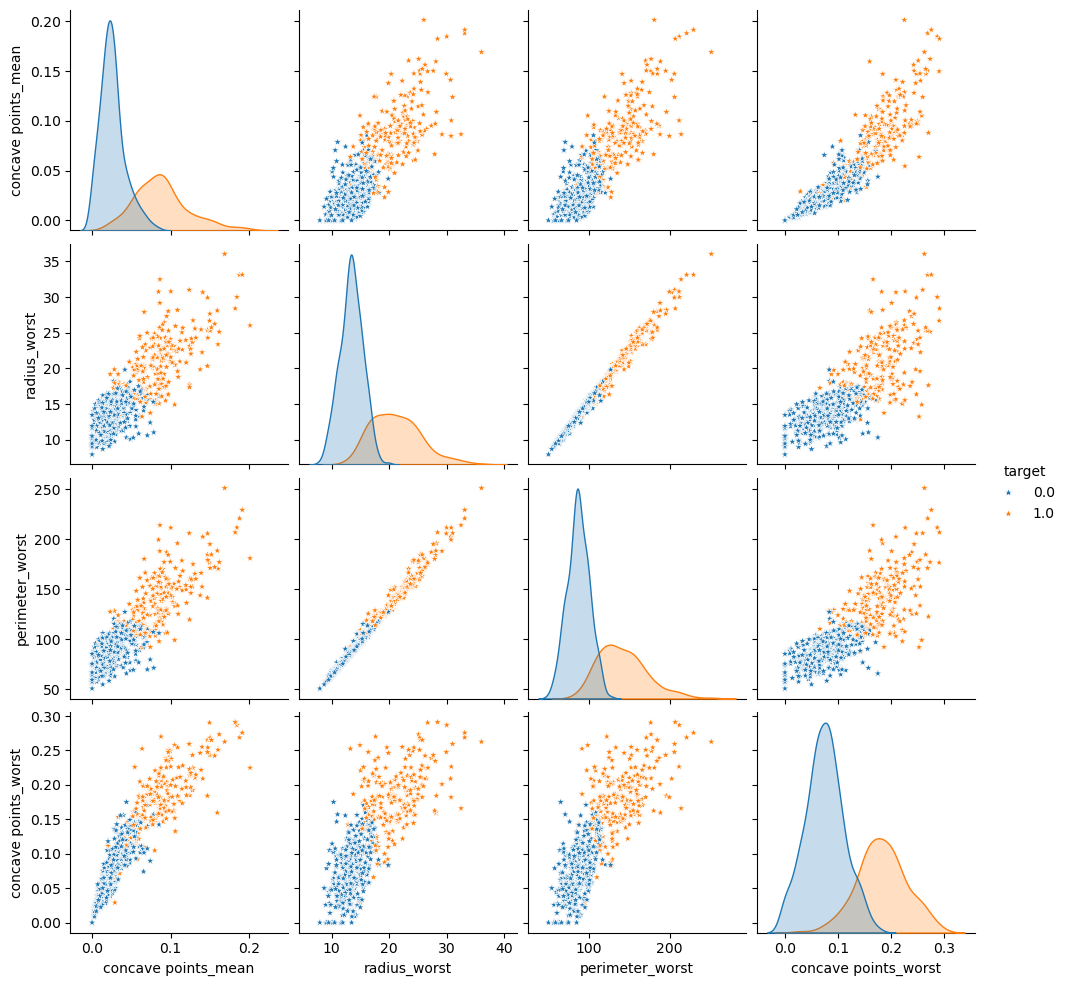

In [364]:
sns.pairplot(data[corr_features], diag_kind = "kde" , markers = "*", hue="target")
plt.show()

# Machine Learning Model Evaluation

In [372]:
# Splitting data
x= data.drop('target',axis=1)
y= data['target']

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [293]:
s= StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [188]:
algorithm = ['KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','LogisticRegression']
Accuracy=[]

In [262]:
def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc=accuracy_score(y_test,pred) 
    Accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test,pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix without Normalization
    print('Normalized confusion matrix')
    
    # Calculate confusion matrix with Normalization 
    cm1 = confusion_matrix(y_test,pred, normalize='all')
    
    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test,pred))
    print('accuracy_score : ' , acc)



### KNN machine learning model Evaluation for breast cancer

confusion matrix


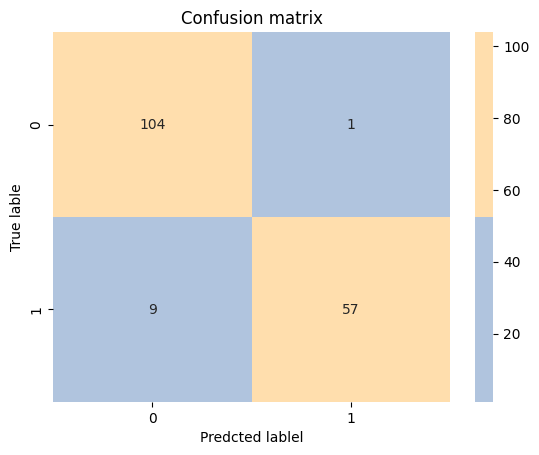

Normalized confusion matrix


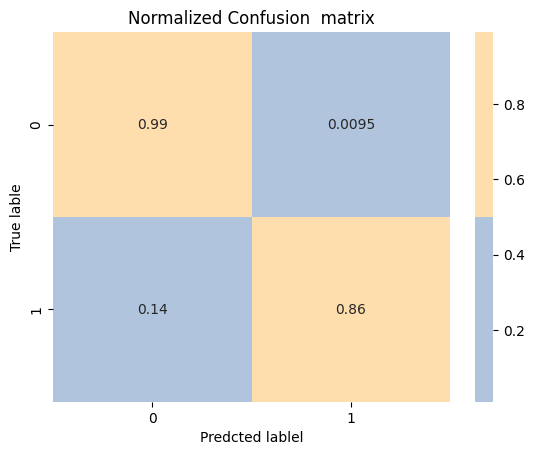

[[104   1]
 [  9  57]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       105
         1.0       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573


In [28]:
model_1 =KNeighborsClassifier(n_neighbors=2)
all(model_1)

### RandomForest

confusion matrix


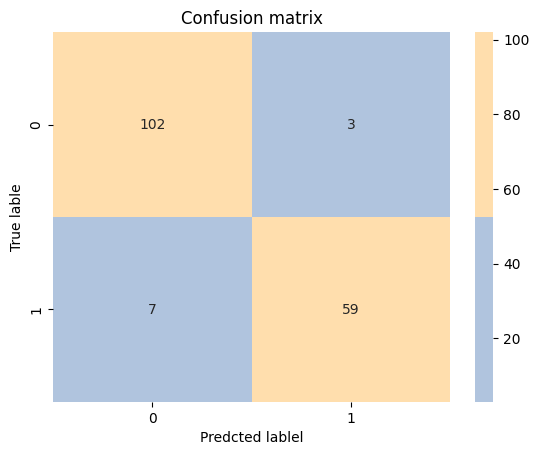

Normalized confusion matrix


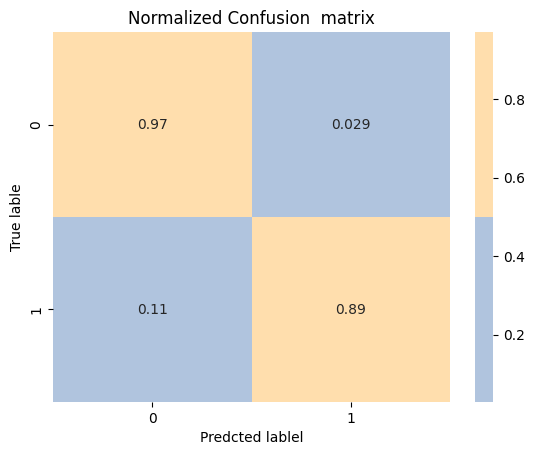

[[102   3]
 [  7  59]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       105
         1.0       0.95      0.89      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573


In [29]:
model_2= RandomForestClassifier(n_estimators=100,random_state=0)
all(model_2)

### DecisionTree

confusion matrix


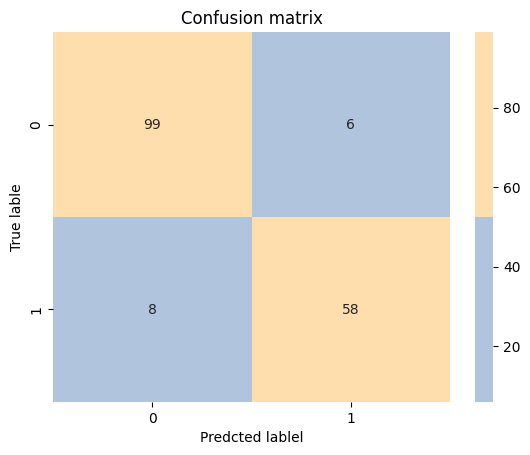

Normalized confusion matrix


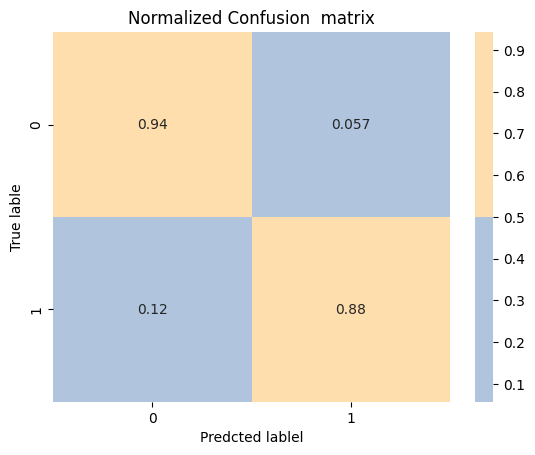

[[99  6]
 [ 8 58]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       105
         1.0       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

accuracy_score :  0.9181286549707602


In [30]:
model_3 = DecisionTreeClassifier(random_state=42)
all(model_3)

### Logistic Regression

confusion matrix


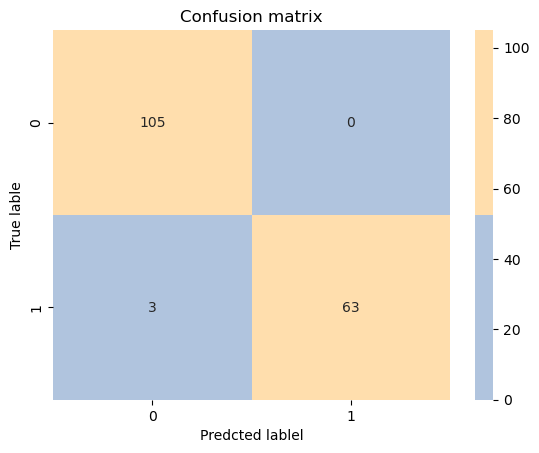

Normalized confusion matrix


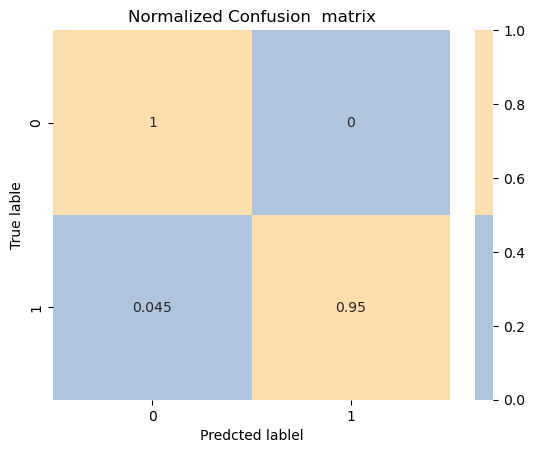

[[105   0]
 [  3  63]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       105
         1.0       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

accuracy_score :  0.9824561403508771


In [166]:
model_5 = LogisticRegression()
all(model_5)

## Improving accuracy results of algorithm models using GridSearch CV (KNN, Random Forest, Decision Tree)

In [366]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the models and hyperparameter grids
param_grids = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Loop through models and apply GridSearchCV
best_estimators = {}
for model_name, model_info in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    # Save the best model for later use
    best_estimators[model_name] = grid_search.best_estimator_
    
    # Evaluate on test data
    y_pred = grid_search.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Test Accuracy for {model_name}: {accuracy}\n")

Running GridSearchCV for KNN...
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Test Accuracy for KNN: 0.9532163742690059

Running GridSearchCV for RandomForest...
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy for RandomForest: 0.9473684210526315

Running GridSearchCV for DecisionTree...
Best Parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Test Accuracy for DecisionTree: 0.9415204678362573



## Improving the best accuracy result from Logistic Regression Model using Gridsearch CV

In [367]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Model algorithm
model = LogisticRegression(max_iter=1000)

#Tuning parameters
parameters = {'C':[0.001,0.01, 0.1, 0.2,0.3, 1,10,100,200]}
grid_search = GridSearchCV(model, parameters, cv = 20)

# Model fitting
grid_search.fit(x_train, y_train)

print("Best Score is ", grid_search.best_score_)
print("Best Estimator is ", grid_search.best_estimator_)
print("Best Parameters are", grid_search.best_params_)

Best Score is  0.9823684210526314
Best Estimator is  LogisticRegression(C=0.2, max_iter=1000)
Best Parameters are {'C': 0.2}


# Best accuracy results achieved from algorithm and hypertuning: 

KNeighbors (KNN) accuracy_score : 0.9532163742690059 (95.32%)

RandomForestClassifier accuracy :0.9473684210526315 (94.73%)

DecisionTree accurary :0.94152046783625732( 94.55)%

Logistic Regression : 0.9824358974358974 (98.24%)